In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
#Displaying the data
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
#descriptive statistics
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# The mean sales generated by each zone.

In [5]:
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

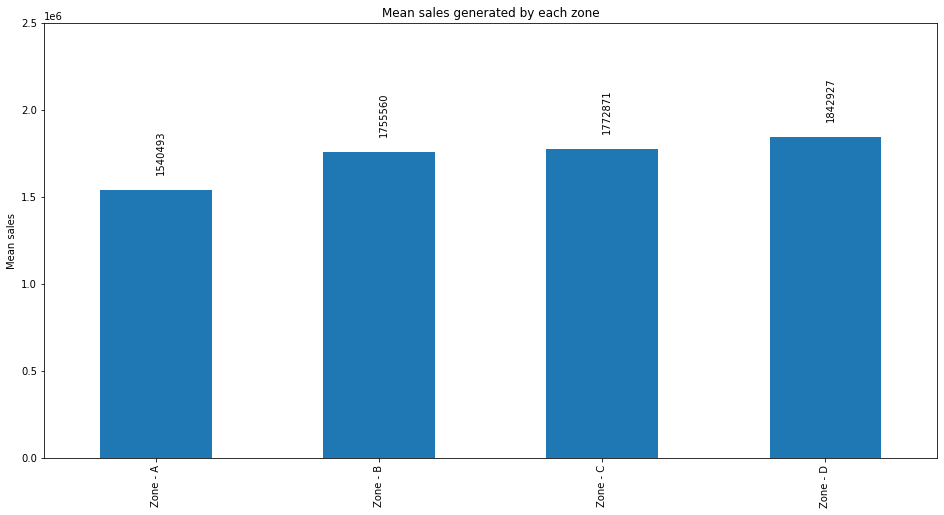

In [6]:
#visualising the mean sales generated by each zone
plt.figure(figsize=(16,8))
fig=data.mean().plot.bar()
plt.ylim(0,2500000)
plt.title('Mean sales generated by each zone')
plt.ylabel('Mean sales')
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height()) , (p.get_x()+0.25, p.get_height()+100000),rotation=90)
plt.show()

# Total sales generated by all the zones for each month.

In [7]:
data["Total_Sales"]=data['Zone - A']+data['Zone - B']+data['Zone - C']+data['Zone - D']

In [8]:
data.loc[:,['Month',"Total_Sales"]]

,Month,Total_Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


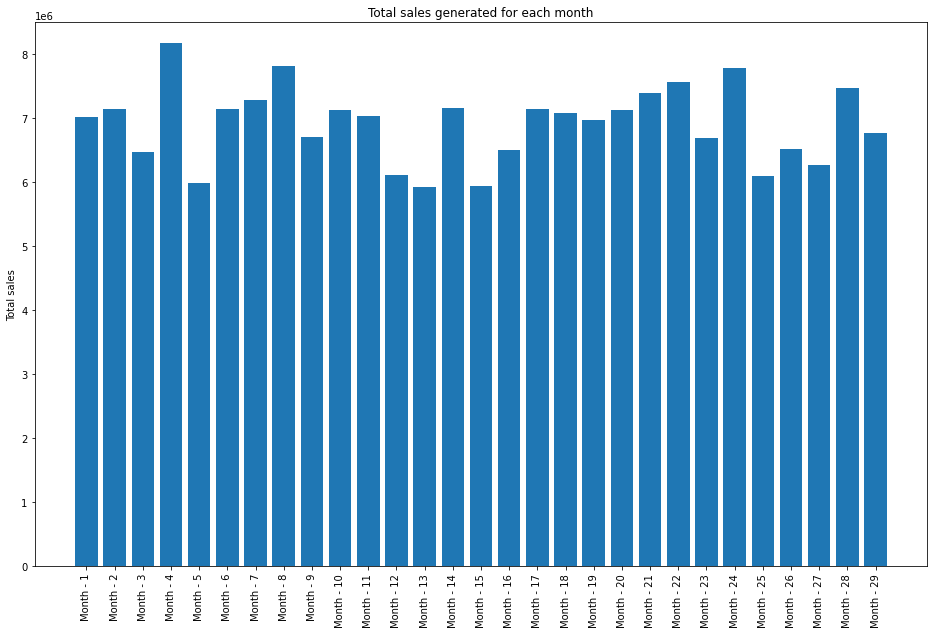

In [9]:
#visualising the total sales generated for each month
plt.figure(figsize=(16,10))
plt.bar(data['Month'],data['Total_Sales'])
plt.ylim(0,8500000)
plt.xticks(rotation=90)
plt.title('Total sales generated for each month')
plt.ylabel('Total sales')
plt.show()

# Check whether all the zones generate the same amount of sales.

In [10]:
#A one-way ANOVA can be done.

Null Hypothesis: <br>H0: All the zones generate the same amount of sales. <br>
Alternate Hypothesis: <br>Ha: There is a significant difference among the means of the samples.

In [11]:
#Deciding level of significance
alpha=0.05

In [12]:
#calculating F-statistic and p-value
F_stat,p_value=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

In [13]:
if p_value<alpha:
    print('F statistic = ',round(F_stat,3),'\np_value = ',round(p_value,3),'\nalpha = ',alpha,'\nInference:\nSince, the p-value is lesser than the alpha value, we can reject the null hypothesis.\nThere is a significant difference among the means of the samples.')
else:
    print('F statistic = ',round(F_stat,3),'\np_value = ',round(p_value,3),'\nalpha = ',alpha,'\nInference:\nSince, the p-value is higher than the alpha value, we cannot reject the null hypothesis.\nAll the zones generate the same amount of sales.')

F statistic =  5.672 
p_value =  0.001 
alpha =  0.05 
Inference:
Since, the p-value is lesser than the alpha value, we can reject the null hypothesis.
There is a significant difference among the means of the samples.


<AxesSubplot:>

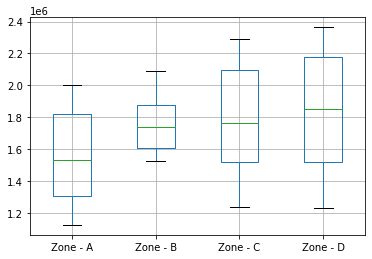

In [14]:
#visualising the data
data.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'])

The above box plots supports the results of the ANOVA test.<br> All the zones do not generate the same amount of sales.